**MKT 339.13 Final Data Mining assignment**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Concept_cars.csv to Concept_cars.csv


In [4]:
# Read the CSV into a dataframe
Concept = pd.read_csv(io.BytesIO(uploaded['Concept_cars.csv']))

**Display the number of rows and columns in the dataframe**

In [5]:
Concept.shape

(1000, 25)

**Display the coulmn names, their datatype and no. of records**

In [6]:
Concept.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hometown_size                1000 non-null   object
 1   Gender                       1000 non-null   object
 2   Marital_status               1000 non-null   object
 3   Household_size               1000 non-null   int64 
 4   Age                          1000 non-null   object
 5   Education                    1000 non-null   object
 6   Household_income             1000 non-null   object
 7   Dwelling_type                1000 non-null   object
 8   Car_choice_now               1000 non-null   object
 9   Planning_to_buy_in_12months  1000 non-null   object
 10  Conserve                     1000 non-null   int64 
 11  Fuelefficient                1000 non-null   int64 
 12  supercycle1                  1000 non-null   int64 
 13  runaboutsport2seat           1000 

In [7]:
### Sample of the records in the dataframe

In [8]:
Concept.head()

,Hometown_size,Gender,Marital_status,Household_size,Age,Education,Household_income,Dwelling_type,Car_choice_now,Planning_to_buy_in_12months,Conserve,Fuelefficient,supercycle1,runaboutsport2seat,economyhybrid4seat,Novelist,Innovator,Trendsetter,Mainstreamer,Favorite_TV_type,Favorite_music_genre,Favorite_news_type,Favorite_news_section,Socialmedia_dailyspent,online_games_spent
0,1 million and more,Male,Married (Includes Cohabitation),3,50 to 59,Bachelor's degree,$101K to $150K,Single family,Luxury,No,4,4,4,4,6,5,5,3,6,Documentary,Jazz & blues,"News, politics & current events",Local news,Less than 1 hour,Less than 1 hour
1,100K to 500K,Male,Married (Includes Cohabitation),3,40 to 49,Bachelor's degree,$76K to $100K,Condominium/Townhouse,None,No,3,4,2,4,2,3,6,6,2,Science Fiction,Pop & Chart,Family & parenting,Sports,Less than 1 hour,About 1 hour
2,10K to 100K,Female,Married (Includes Cohabitation),3,30 to 39,Bachelor's degree,$101K to $150K,Single family,Standard,Yes,4,7,3,3,3,4,5,7,6,Documentary,Pop & Chart,"News, politics & current events",Local news,About 1 hour,About 2 hours
3,100K to 500K,Male,Married (Includes Cohabitation),2,40 to 49,Some college or Associate's degree,$50K to $75K,Single family,Luxury,No,7,7,4,7,4,6,7,5,1,Movies/Miniseries,Talk,Sports & outdoors,Sports,About 2 hours,About 2 hours
4,100K to 500K,Female,Married (Includes Cohabitation),2,30 to 39,Bachelor's degree,$76K to $100K,Single family,Luxury,No,7,7,7,2,7,1,5,7,2,Reality,Pop & Chart,Music & entertainment,Local news,About 1 hour,About 1 hour


**Descriptive statistics for all the numerical variables in the dataset**

From the table below, it can be seen that all the numerical variables are discrete variables ranging from 1 to 7



In [9]:
Concept.describe()

,Household_size,Conserve,Fuelefficient,supercycle1,runaboutsport2seat,economyhybrid4seat,Novelist,Innovator,Trendsetter,Mainstreamer
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.605000,5.023000,5.326000,4.040000,4.221000,4.357000,3.880000,5.02500,5.065000,3.591000
std,0.958067,2.038781,2.318858,1.832965,1.522655,1.812964,1.422541,1.47667,1.695774,1.937905
min,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.00000,4.000000,2.000000
50%,3.000000,5.000000,7.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,3.000000
75%,3.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.00000,7.000000,5.000000
max,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000


**Frequencies for each category in the categorical variables**

In [10]:
for col in Concept.select_dtypes('object'):
  print(Concept[col].value_counts(dropna=False).to_frame().reset_index().rename(columns={col:'Count','index':col}))
  print(sep='\n')

        Hometown_size  Count
0   500K to 1 million    396
1        100K to 500K    246
2         10K to 100K    190
3  1 million and more    128
4           Under 10K     40

   Gender  Count
0    Male    560
1  Female    440

                    Marital_status  Count
0  Married (Includes Cohabitation)    890
1                        Unmarried    110

            Age  Count
0      40 to 49    440
1      30 to 39    320
2      50 to 59    145
3  60 and older     75
4      20 to 29     20

                            Education  Count
0                   Bachelor's degree    548
1  Some college or Associate's degree    275
2     Graduate or professional degree     85
3                High school graduate     74
4               Less than high school     18

  Household_income  Count
0    $76K to $100K    393
1   $101K to $150K    332
2     $50K to $75K    163
3       Over $150K     91
4       Under $50K     21

           Dwelling_type  Count
0        Multiple family    377
1          Sing

**Pie chart of household size**

**Observation 1** : From the Pie chart below, it can be seen that Household size 2 and 3 account for almost 75% of the records

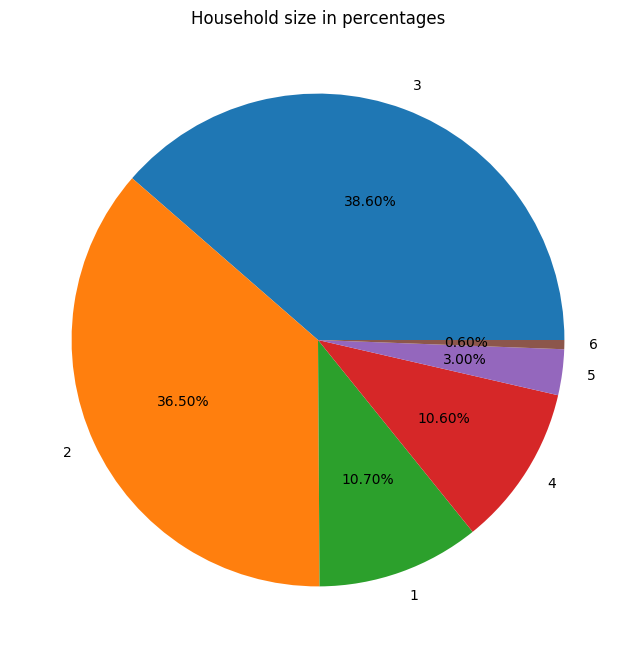

In [11]:
df_household_size = Concept['Household_size'].value_counts(dropna=False)
df_household_size.columns = 'Household_size'
df_household_size.plot.pie(y='Household_size',
           autopct='%1.2f%%',
           ylabel='',
           fontsize=10,
           figsize=(12,8),
           title='Household size in percentages');

**Correlation matrix for numerical variables**

A correlation matrix shows the correlation coefficients between numerical variables. The closer the number is to 1 (or -1), the stronger the correlation. 

**Observation 2** - There is a positive correlation (0.60) between Fuelefficient and Conserve. Which indicates that a higher rating for "Conserve" would also lead to a higher rating for "Fuelefficient" and vice versa. This is expected since both the variables are related to using less fuel and fuel efficient vehicle 

**Observation 3** - The correlation between economyhybrid4seat and Conserve is almost 0, which indicates that there is no linear relationship between these two variables.

In [12]:
# Correlation matrix
Concept.corr()

,Household_size,Conserve,Fuelefficient,supercycle1,runaboutsport2seat,economyhybrid4seat,Novelist,Innovator,Trendsetter,Mainstreamer
Household_size,1.000000,0.027204,-0.002356,-0.004674,-0.213199,0.048994,-0.091368,-0.003626,0.106390,-0.017013
Conserve,0.027204,1.000000,0.603335,-0.030515,-0.011957,-0.000057,-0.018375,0.021088,-0.028807,-0.046261
Fuelefficient,-0.002356,0.603335,1.000000,-0.044285,-0.011920,-0.033188,-0.034254,0.061346,0.013698,-0.047372
supercycle1,-0.004674,-0.030515,-0.044285,1.000000,0.026239,0.512601,-0.286464,-0.023669,-0.058483,-0.004126
runaboutsport2seat,-0.213199,-0.011957,-0.011920,0.026239,1.000000,0.107008,0.037211,0.452084,-0.334315,-0.014794
economyhybrid4seat,0.048994,-0.000057,-0.033188,0.512601,0.107008,1.000000,-0.131251,-0.090457,-0.234821,0.032484
Novelist,-0.091368,-0.018375,-0.034254,-0.286464,0.037211,-0.131251,1.000000,-0.060519,0.093282,0.019579
Innovator,-0.003626,0.021088,0.061346,-0.023669,0.452084,-0.090457,-0.060519,1.000000,-0.173339,-0.023008
Trendsetter,0.106390,-0.028807,0.013698,-0.058483,-0.334315,-0.234821,0.093282,-0.173339,1.000000,-0.035460
Mainstreamer,-0.017013,-0.046261,-0.047372,-0.004126,-0.014794,0.032484,0.019579,-0.023008,-0.035460,1.000000


**Heatmap of correlation between numerical variables**

**Observation 4** - Although not a very strong relationship, there is a positive correlation between supercycle1 and economyhybrid4seat (0.51)

In [15]:
# Copy all the numerical variables into a dataframe called vehiclepreference
vehiclepreference = Concept.iloc[:,11:19]

<Axes: >

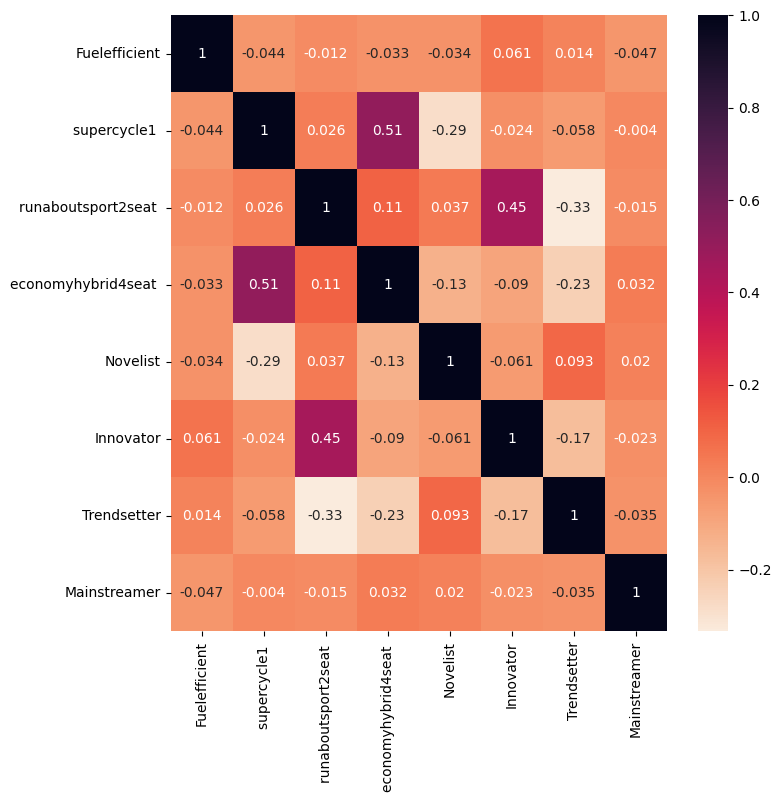

In [16]:
fig, ax = plt.subplots(figsize=(8,8)) 
cmap = sns.cm.rocket_r
sns.heatmap(round(vehiclepreference.corr(),3), annot=True,ax=ax ,cmap=cmap)

**Scatterplot between "Household_size" and "Conserve" and using "Gender" as hue**

The plot below doesn't look like a scatter plot because the variables "Household_size" and "Conserve" have discrete values. It would be more appropriate to use Grouped bar chart (displayed in the next plot) to understand the relationship between the variables

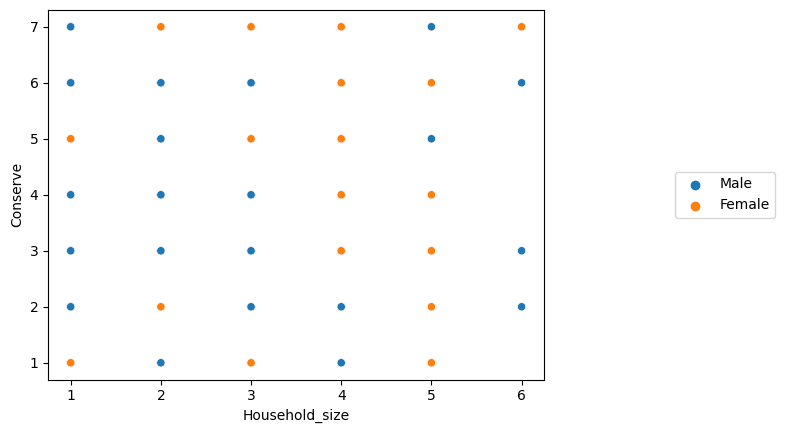

In [17]:
g = sns.scatterplot(x="Household_size", y="Conserve", hue="Gender",data=Concept )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


**Grouped bar chart between Household_size and Conserve**

**Observation 5** - From the plot below, it can be seen that for every household size, the count of consumers that strongly agree (Conserve - 7) that they drive conservatively to use less fuel is higher than the count of consumers for any of the other agreeableness categories.


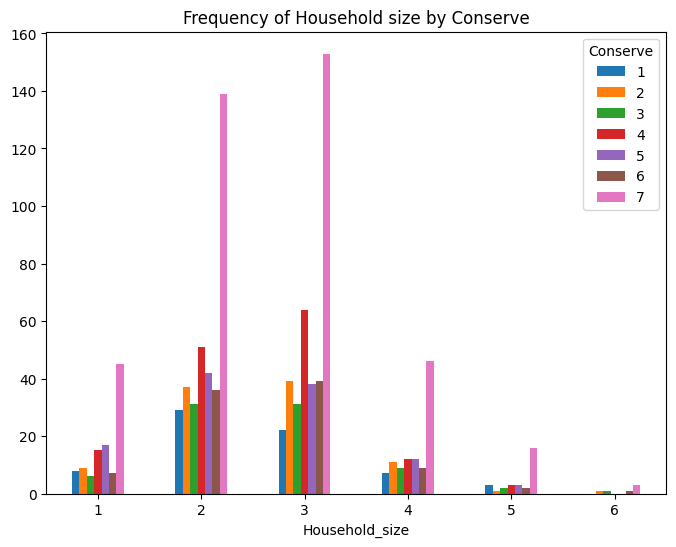

In [20]:
CrosstabResult=pd.crosstab(Concept['Household_size'],Concept['Conserve'])
CrosstabResult.plot.bar(figsize=(8,6),rot=0,title="Frequency of Household size by Conserve");

**Crosstab between Household income vs supercycle1 (1-seat all electric motorcycle), represented as a percentage of total consumers**

**Observation 6** : From the table below, it can be seen that 24% (240) of all the consumers (1,000) have a very strong desire (7) to buy a supercycle1. The automaker needs to mainly focus on consumers that have household income between USD 76K to USD 150K, since 17.60% (176) of this 24% (240) consumers have household income in this range.

In [20]:
df = pd.crosstab(Concept['Household_income'],Concept['supercycle1 '])
df = df.div(len(Concept)).mul(100).round(2)
df = df.reindex(index = ['Under $50K','$50K to $75K','$76K to $100K','$101K to $150K', 'Over $150K'])
df

supercycle1,2,3,4,5,6,7
Household_income,,,,,,
Under $50K,0.3,0.0,0.0,0.5,0.7,0.6
$50K to $75K,3.1,3.6,6.3,0.1,0.0,3.2
$76K to $100K,9.9,8.5,10.9,0.0,0.0,10.0
$101K to $150K,7.9,9.9,7.8,0.0,0.0,7.6
Over $150K,2.0,1.6,2.9,0.0,0.0,2.6



**Grouped bar chart of Household income vs supercycle1(1-seat all electric motorcycle), represented as a percentage of total consumers**

**Observation 7** : The plot below is a visual representation of the crosstab between Household income vs supercycle1. From the plot it can be seen that the percentage of consumers who somewhat desire (5) or desire (6) for supercycle1 is almost negligible whereas 24% of the consumers have a very strong desire (7) for supercycle1. Apart from the consumers with high desirability for supercycle1, the automaker could also focus on 27.90% of consumers that have a "neutral" view about buying this motorcycle.

In [42]:
# Function to plot grouped bar chart
def fun_grouped_bar_chart(Concept,col1,col2):
  df = pd.crosstab(Concept[col1],Concept[col2])
  df.div(len(Concept)).mul(100).round(2)
  df = df.reindex(index = ['Under $50K','$50K to $75K','$76K to $100K','$101K to $150K', 'Over $150K'])
  df=df.div(len(Concept)).mul(100).round(2)
  ax = df.plot.bar(figsize=(18,18),rot=0)
  fig = ax.get_figure()
  fig.set_size_inches(10, 6)
  ax.set_xlabel(col1)
  ax.set_ylabel("Percentage of consumers")
  ax.set_title('Household income and desirability for supercycle1', fontsize=14);
  plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title="supercycle1")
  plt.show()

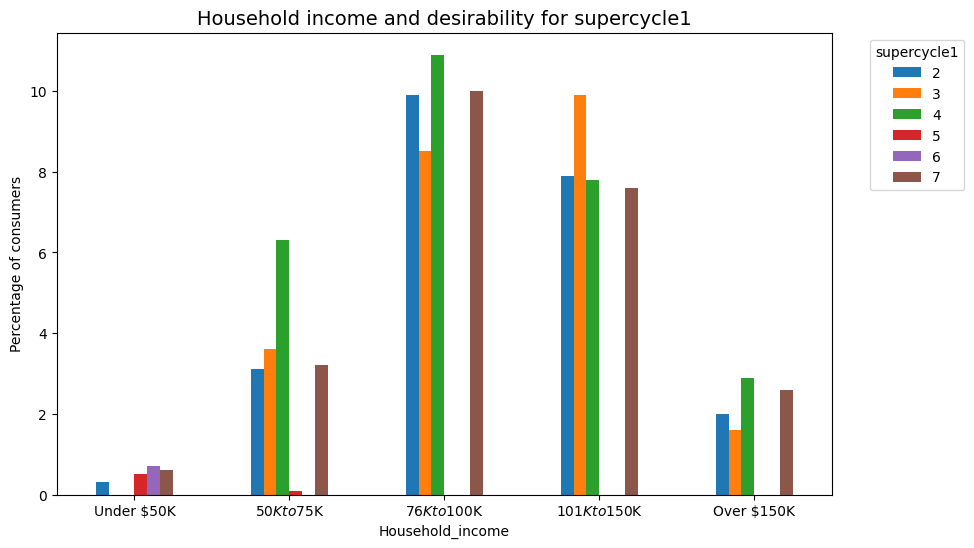

In [43]:
fun_grouped_bar_chart(Concept,'Household_income','supercycle1 ')

**Crosstab of Hometown_size vs runaboutsport2seat (2 seat all-electric car), represented as a percentage of total consumers**

**Observation 8** - From the table below, it can be seen that 18.1% (181) and 7.1% (71) of all the consumers (1,000) that have a desire (5 to 7) to buy a runaboutsport2seat have a Hometown_size costing 550K - 1 million and 1 million+, respectively. The automaker needs to mainly focus on consumers that have these hometown sizes, since they account for majority (252) of all the consumers (300) that desire to buy a runabout sport2seat

In [45]:
df = pd.crosstab(Concept['Hometown_size'],Concept['runaboutsport2seat '])
df = df.div(len(Concept)).mul(100).round(2)
df = df.reindex(index = ['Under 10K','10K to 100K','100K to 500K','500K to 1 million', '1 million and more'])
df
df.reset_index(inplace=True)

runaboutsport2seat,2,3,4,5,6,7
Hometown_size,,,,,,
Under 10K,1.8,1.0,0.2,0.0,0.0,1.0
10K to 100K,3.4,7.7,6.4,0.0,0.0,1.5
100K to 500K,2.4,8.4,11.5,0.0,1.6,0.7
500K to 1 million,2.2,7.4,11.9,1.1,11.7,5.3
1 million and more,0.8,1.4,3.5,0.0,5.3,1.8


**Stacked bar chart of Hometown_size vs runaboutsport2seat (2 seat all-electric car), represented as a percentage of total consumers**

**Observation 9** - The plot below is a visual representation of the crosstab between Hometown_size vs runaboutsport2seat. From the plot, it can be seen that 
there are a significant percentage of consumers having hometown size between 10K to 1 million (29.80%) that have a neutral view when it comes to buying a runaboutsport2seat. If the automaker has a significant marketing budget, apart he can focus on this group also apart from the consumers that have been rated as having high desirability for runaboutsport2seat.

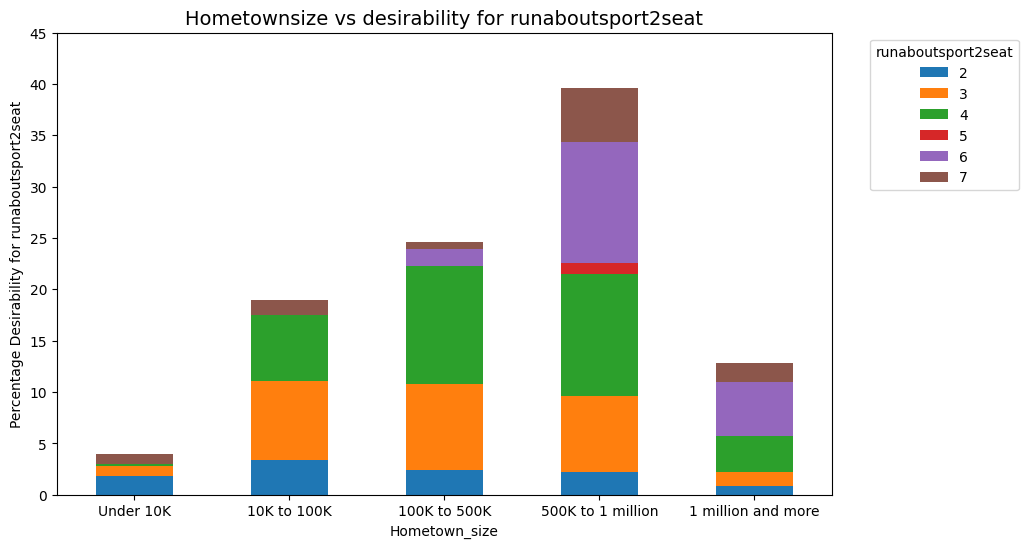

In [46]:
ax = df.plot.bar(x='Hometown_size', stacked=True,  figsize=(8,6), rot=0)
fig = ax.get_figure()
fig.set_size_inches(10, 6)
ax.set_title('Hometownsize vs desirability for runaboutsport2seat', fontsize=14);
ax.set_ylim(0,45);
ax.set_xlabel('Hometown_size')
ax.set_ylabel("Percentage Desirability for runaboutsport2seat")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title="runaboutsport2seat");